In [ ]:
from sklearn.datasets import fetch_openml
#load diabetes dataset from OpenML
diabetes = fetch_openml(name='diabetes', as_frame=True)
list(diabetes.frame.columns)
#print(diabetes.details)
#diabetes.frame.describe()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=37
- version 5, status: active
  url: https://www.openml.org/search?type=data&id=42608

  warn(warning_msg)


['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']

In [ ]:
# Import required libraries
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier

In [ ]:
# Import model to divide data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
target_column = ['class']
#derive the list of predictor column id's
predictors = list(set(list(diabetes.frame.columns))-set(target_column))
#standardize the predictors by diividing by the maximum
diabetes.frame[predictors] = diabetes.frame[predictors]/diabetes.frame[predictors].max()
#provide summary statistics for the dataframe
diabetes.frame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
plas,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
pres,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
skin,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
insu,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
mass,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
pedi,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0


In [ ]:
#Get rid of any rown with NA's
diabetes.frame = diabetes.frame.dropna()

In [ ]:
#the input data
X = diabetes.frame[predictors].values
#the output data
y = diabetes.frame[target_column].values

In [ ]:
#we encode target classes from strings to numbers as neural networks cannot require all numerical inputs and outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [ ]:
from sklearn import svm

svm_model = svm.SVC(decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
# Predict on the training data using the trained SVM model
predict_train = svm_model.predict(X_train)

print('Training accuracy')
#we report the confusion matrix for the training set
print(confusion_matrix(y_train,predict_train))
#we report various accuracy statistics for the training set
print(classification_report(y_train,predict_train))

Training accuracy
[[322  27]
 [ 75 113]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       349
           1       0.81      0.60      0.69       188

    accuracy                           0.81       537
   macro avg       0.81      0.76      0.78       537
weighted avg       0.81      0.81      0.80       537



Testing accuracy
[[134  17]
 [ 34  46]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       151
           1       0.73      0.57      0.64        80

    accuracy                           0.78       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.78      0.77       231



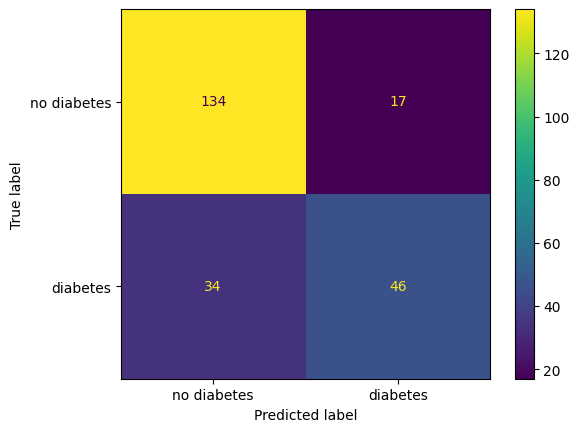

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

print('Testing accuracy')
# Predict on the test data
predict_test = svm_model.predict(X_test)
#we report the confusion matrix for the test set
cm = confusion_matrix(y_test,predict_test) # Assign the confusion matrix to cm
print(cm)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['no diabetes', 'diabetes'])
cm_disp.plot()

#we report various accuracy statistics for the test set
print(classification_report(y_test,predict_test))
